# 01 — Quickstart (mcport)

Demo práctica de PriceSeries/Portfolio/MonteCarlo/Plots/Report.

El objetivo de este notebook es **analizar las series históricas de precios** y realizar una **simulación Monte Carlo** sobre una **cartera temática diversificada naive**.  
Esta cartera combina **tecnología, energía e industria** para equilibrar crecimiento, estabilidad y cobertura ante ciclos económicos.

> 📈 *El histórico de precios se extraerá desde Yahoo Finance, cubriendo los últimos **3 años** de cotización, y se empleará para estimar la evolución esperada durante los próximos **6 meses** (estrategia semestral) mediante simulación Monte Carlo.*

---

Se han elegido **seis empresas estadounidenses** líderes en sus respectivos sectores, todas cotizadas en **USD**, para simplificar el análisis y evitar efectos por tipo de cambio.

| 🏷️ Sector | 🏢 Empresa | 💹 Ticker | 🧭 Descripción |
|:-----------|:------------|:-----------|:----------------|
| 🧠 **Tecnología** | Apple Inc. | `AAPL` | Ecosistema iOS/macOS y hardware premium |
| 🧠 **Tecnología** | NVIDIA Corp. | `NVDA` | GPUs, IA y semiconductores de alto rendimiento |
| ⚡ **Energía** | Exxon Mobil Corp. | `XOM` | Energía fósil, exploración y refino |
| ⚡ **Energía** | NextEra Energy Inc. | `NEE` | Energías renovables y utilities eléctricas |
| 🏗️ **Industria / Defensa** | Lockheed Martin Corp. | `LMT` | Fabricante aeroespacial y de defensa |
| 🚜 **Industria / Construcción** | Caterpillar Inc. | `CAT` | Maquinaria pesada y equipamiento industrial |



## 1. Extracción de datos

In [ ]:
#Importación de librerías

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme(context="notebook", style="whitegrid")
from mcport.providers import YahooProvider, AlphaVantageProvider
from mcport import PriceSeries, Portfolio, MonteCarloSimulation, MonteCarloPlots, var_cvar

Usaremos el extractor de yfinance para obtener los datos crudos.

In [3]:
from mcport.providers import YahooProvider

# --- Tickers de la cartera diversificada (USD) ---
symbols = ["AAPL", "NVDA", "XOM", "NEE", "LMT", "CAT"]

# Instancia del proveedor Yahoo
provider = YahooProvider()

# 3 años (~756 días hábiles)
dict_pricehistory = provider.price_history(symbols=symbols, periods=756)

# Vista previa de los precios descargados
for sym, df in dict_pricehistory.items():
    print(f"\n📈 {sym} ({len(df)} registros)")
    display(df.head())



📈 AAPL (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-10-31,153.160004,154.240005,151.919998,153.339996,150.957077,97943200
2022-11-01,155.080002,155.449997,149.130005,150.649994,148.308884,80379300
2022-11-02,148.949997,152.169998,145.000000,145.029999,142.776215,93604600
2022-11-03,142.059998,142.800003,138.750000,138.880005,136.721802,97918500
2022-11-04,142.089996,142.669998,134.380005,138.380005,136.455536,140814800



📈 NVDA (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-10-31,13.778,13.838,13.297,13.497,13.480803,486341000
2022-11-01,13.811,13.925,13.519,13.543,13.526750,432817000
2022-11-02,13.850,14.210,13.211,13.219,13.203135,672628000
2022-11-03,13.043,13.781,12.956,13.421,13.404896,500065000
2022-11-04,13.986,14.229,13.697,14.156,14.139013,612576000



📈 XOM (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-10-31,109.500000,112.910004,109.440002,110.809998,100.017891,26401800
2022-11-01,112.370003,112.570000,110.650002,111.910004,101.010750,22213100
2022-11-02,111.580002,112.099998,109.309998,109.610001,98.934746,20654200
2022-11-03,108.580002,111.820000,108.309998,111.099998,100.279640,17103700
2022-11-04,113.000000,113.500000,110.800003,112.309998,101.371796,17541500



📈 NEE (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-10-31,78.449997,79.269997,76.760002,77.500000,71.143288,8273700
2022-11-01,78.190002,78.190002,77.169998,77.709999,71.336075,5410300
2022-11-02,77.699997,79.830002,77.019997,77.279999,70.941338,7119000
2022-11-03,76.739998,79.180000,76.360001,78.180000,71.767517,6920300
2022-11-04,78.599998,79.180000,77.419998,78.800003,72.336678,7758900



📈 LMT (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-10-31,480.450012,488.230011,479.429993,486.679993,449.127502,1288200
2022-11-01,486.029999,491.160004,483.869995,485.630005,448.158539,1229700
2022-11-02,484.540009,488.880005,481.500000,482.059998,444.864014,1291800
2022-11-03,479.769989,489.970001,478.549988,484.820007,447.411041,1291100
2022-11-04,485.160004,486.500000,472.570007,481.670013,444.504120,1481100



📈 CAT (756 registros)


,open,high,low,close,adj_close,volume
Date,,,,,,
2022-10-31,215.339996,218.869995,215.009995,216.460007,205.663422,3786100
2022-11-01,218.630005,219.470001,216.710007,218.500000,207.601669,2717500
2022-11-02,217.600006,221.699997,213.929993,214.539993,203.839172,3150000
2022-11-03,211.539993,221.789993,211.360001,219.259995,208.323792,3570400
2022-11-04,224.020004,229.729996,223.600006,227.850006,216.485306,4973800


## 2. Convertimos los activos a una PriceSeries y los agrupamos en un Portfolio

Convertir a PriceSeries el DataFrame permite unificar formatos y aplica funciones internas de limpieza.

In [ ]:
#Creamos el diccionario de PriceSeries
price_series_dict = {}

for sym, df in dict_pricehistory.items():
    ps = PriceSeries.from_dataframe(
        symbol=sym,
        df=df,
        price_col="adj_close",
        currency="USD",
        provider="YahooFinance",
        asset_type="equity"
    )
    price_series_dict[sym] = ps

    
#Resumen rápido de estadísticas de las PriceSeries

for sym, ps in price_series_dict.items():
    s = ps.extra_stats()
    print(f"""
──────────────────────────────
📈 {sym}  ({len(ps.data)} registros)
μ diario:  {ps.mu:>8.6f}     σ diario: {ps.sigma:>8.6f}
μ anual:   {s['mu_ann']:>8.3f}     σ anual: {s['sigma_ann']:>8.3f}
Sharpe:    {s['sharpe_daily']:>8.3f}     Skew: {s['skew']:>8.3f}
Kurtosis:  {s['kurtosis']:>8.3f}
VaR95:     {s['var_95']:>8.3f}     CVaR95: {s['cvar_95']:>8.3f}
──────────────────────────────
""")



──────────────────────────────
📈 AAPL  (788 registros)
μ diario:  0.000741     σ diario: 0.016603
μ anual:      0.187     σ anual:    0.264
Sharpe:       0.045     Skew:    0.550
Kurtosis:    10.082
VaR95:       -0.026     CVaR95:   -0.038
──────────────────────────────


──────────────────────────────
📈 NVDA  (788 registros)
μ diario:  0.003435     σ diario: 0.031440
μ anual:      0.866     σ anual:    0.499
Sharpe:       0.109     Skew:    0.448
Kurtosis:     6.448
VaR95:       -0.044     CVaR95:   -0.066
──────────────────────────────


──────────────────────────────
📈 XOM  (788 registros)
μ diario:  0.000171     σ diario: 0.014267
μ anual:      0.043     σ anual:    0.226
Sharpe:       0.012     Skew:   -0.363
Kurtosis:     1.930
VaR95:       -0.023     CVaR95:   -0.033
──────────────────────────────


──────────────────────────────
📈 NEE  (788 registros)
μ diario:  0.000182     σ diario: 0.017039
μ anual:      0.046     σ anual:    0.270
Sharpe:       0.011     Skew:   -0.750
Kur

Creación de la cartera. Asignaremos pesos a los assets del 40% para el sector tecnológico, 15% para energía y 15% para industria y defensa.

Serie generada con 787 puntos


2022-11-01    1.000000
2022-11-02    0.979959
2022-11-03    0.982167
2022-11-04    0.999876
2022-11-07    1.004217
Freq: B, Name: Cartera_Diversificada, dtype: float64

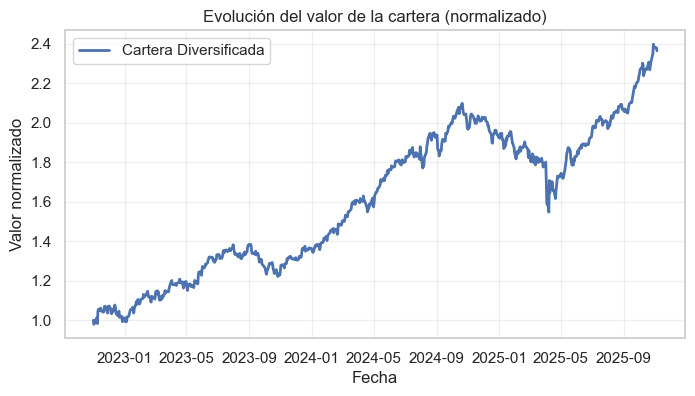

In [ ]:
# --- Seleccionamos los PriceSeries del diccionario ---
positions = [
    price_series_dict["AAPL"],
    price_series_dict["NVDA"],
    price_series_dict["XOM"],
    price_series_dict["NEE"],
    price_series_dict["LMT"],
    price_series_dict["CAT"],
]

# --- Pesos según bloques temáticos ---
weights = [0.20, 0.20, 0.15, 0.15, 0.15, 0.15]

# --- Creamos la cartera ---
portfolio = Portfolio(
    positions=positions,
    weights=weights,
    name="Cartera_Diversificada",
    currency="USD"
)

# --- Verificamos que la cartera esté bien creada ---

# Serie de valor normalizada (1 = inicio)
eq_curve = portfolio.value_series(initial_capital=1.0)

print(f"Serie generada con {len(eq_curve)} puntos")
display(eq_curve.head())

# Visual rápida
plt.figure(figsize=(8,4))
plt.plot(eq_curve, label="Cartera Diversificada", linewidth=2)
plt.title("Evolución del valor de la cartera (normalizado)")
plt.xlabel("Fecha")
plt.ylabel("Valor normalizado")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



## 3. Aplicamos método Monte Carlo para predecir los siguientes 6 meses
Veremos cómo aplicarlo a cada uno de los activos y a la cartera en su totalidad.

In [17]:
results_assets = {}
n_days = 126         # 6 meses ~ 126 días hábiles
n_sims = 2000
seed = 42

# ----------------------------
# 1) Monte Carlo por activo
# ----------------------------
for sym, ps in price_series_dict.items():
    mc = MonteCarloSimulation(ps, symbol=sym)
    res = mc.simulate_and_summarize(days=n_days, n_sims=n_sims, seed=seed)
    results_assets[sym] = res

    # Resumen
    s = res["summary"]
    print(f"📈 {sym} | p5={s['p5']:.2f}, p50={s['p50']:.2f}, p95={s['p95']:.2f}")

# ----------------------------
# 2) Monte Carlo del Portfolio
# ----------------------------
mc_port = MonteCarloSimulation(portfolio.value_series(initial_capital=1.0), symbol="Cartera Global")
res_port = mc_port.simulate_and_summarize(days=n_days, n_sims=n_sims, seed=seed)

# Resumen
summary = res_port["summary"]
print("\n💼 Cartera Global")
print({k: round(v, 2) for k, v in summary.items()})

📈 AAPL | p5=215.86, p50=291.14, p95=396.54
📈 NVDA | p5=164.69, p50=290.20, p95=520.95
📈 XOM | p5=89.08, p50=115.20, p95=150.23
📈 NEE | p5=60.55, p50=82.30, p95=113.01
📈 LMT | p5=375.63, p50=474.71, p95=604.56
📈 CAT | p5=479.01, p50=657.27, p95=911.27

💼 Cartera Global
{'p5': 2.19, 'p25': 2.47, 'p50': 2.69, 'p75': 2.94, 'p95': 3.32}


In [ ]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme(context="notebook", style="whitegrid")
from mcport import PriceSeries, Portfolio, MonteCarloSimulation, MonteCarloPlots, MonteCarloReport, drawdowns

idx = pd.bdate_range('2022-01-03','2024-12-31')
def gbm(n, mu=0.1, sigma=0.2, s0=100, seed=0):
    rng=np.random.default_rng(seed); dt=1/252
    z=rng.standard_normal(n-1)
    path=np.r_[0, np.cumsum((mu-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*z)]
    return s0*np.exp(path)
a = PriceSeries(symbol="ASSET_A", asset_type="equity", currency="USD", provider="sim",
                data=pd.DataFrame({"price":gbm(len(idx),0.12,0.25,100,1)}, index=idx))
b = PriceSeries(symbol="ASSET_B", asset_type="equity", currency="USD", provider="sim",
                data=pd.DataFrame({"price":gbm(len(idx),0.06,0.12, 50,2)}, index=idx))
port = Portfolio(positions=[a,b], weights=[0.6,0.4], name="Demo 60_40", currency="USD")

mc = MonteCarloSimulation(price_series=port)
summ = mc.simulate_and_summarize(days=252, n_sims=1000, seed=7)
plots = MonteCarloPlots(mc)
plots.plot_history()
plots.plot_history_with_simulations(summ["prices"])
plots.plot_final_hist(summ["prices"])
plt.show()

eq = port.value_series(1.0)
drawdowns(eq).plot(title="Drawdown")
plt.show()


In [ ]:

from pathlib import Path
out = Path("reports/pdf"); out.mkdir(parents=True, exist_ok=True)
MonteCarloReport(mc).to_pdf(summ["prices"], str(out/"report_quickstart.pdf"))
print("PDF listo:", (out/"report_quickstart.pdf").resolve())
